In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [39]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


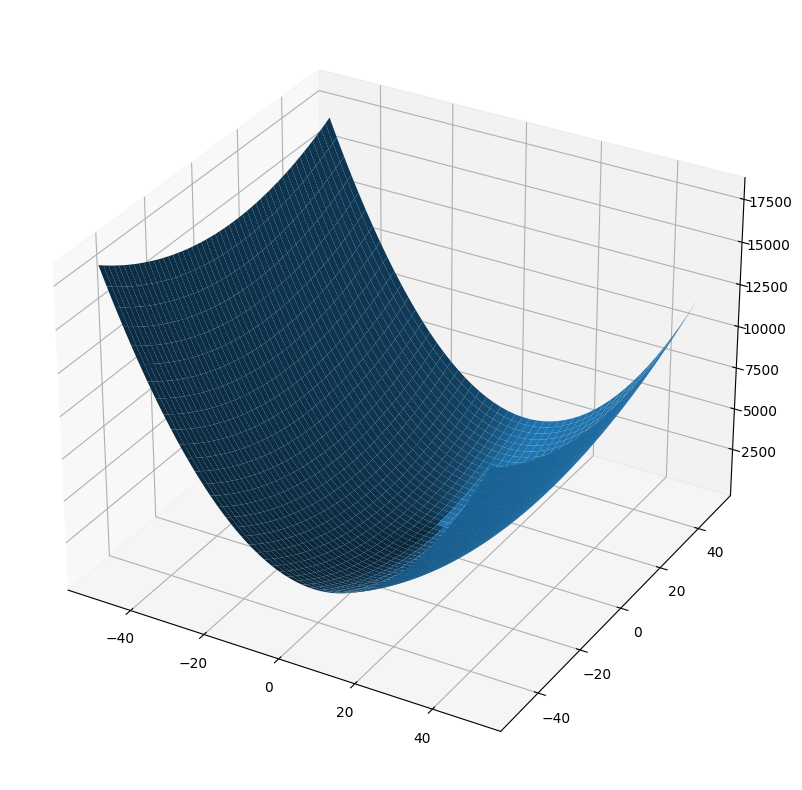

In [40]:
alpha = 5
def quadratic(x):
    return alpha * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def quadratic_derivative(x):
    return [2 * alpha * (x[0]  - 5), 2 * (x[1] - 7)]

quadratic_roi = SearchRegion2d((-50, 50), (-50, 50))

visualize_function_3d(quadratic, quadratic_roi)

Optimizer trajectory:
[[-20.          20.        ]
 [  5.21598581  17.37753748]
 [  4.18043169   7.42641923]
 [  5.00709278   7.34039732]
 [  4.97308933   7.01401798]
 [  5.00023329   7.01119008]
 [  4.99911491   7.00046129]
 [  5.00000769   7.00036823]
 [  4.99997084   7.00001521]
 [  5.00000025   7.00001215]
 [  4.99999904   7.0000005 ]
 [  5.00000001   7.0000004 ]
 [  4.99999997   7.00000002]
 [  5.           7.00000001]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]]
Best value found: x* = [5. 7.] with f(x*) = 1.5777218104420236e-27


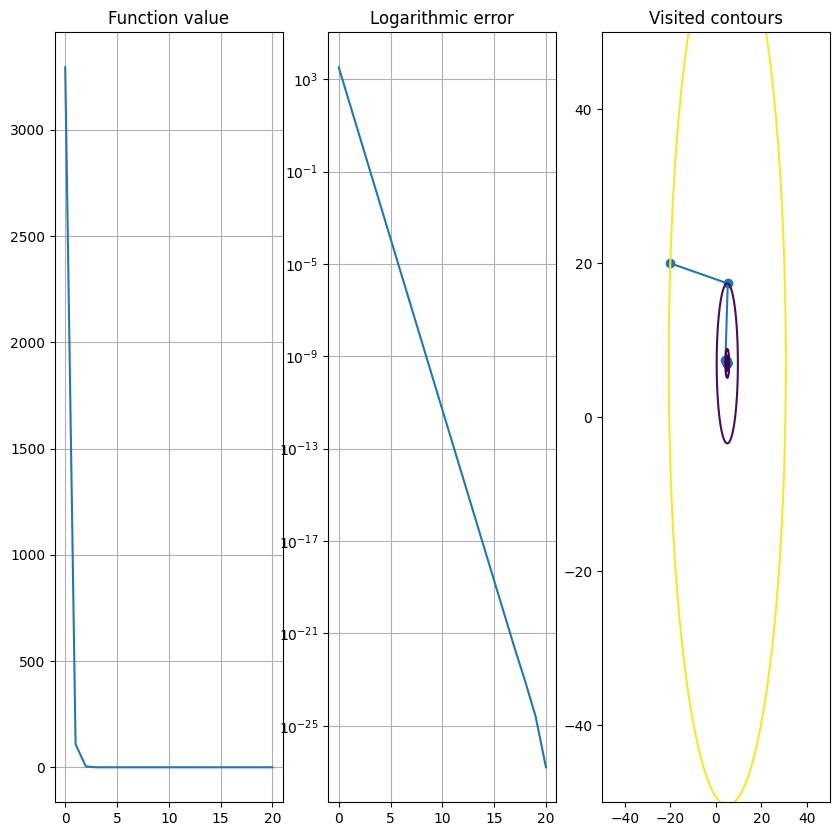

In [41]:
visualize_optimizing_process(quadratic, quadratic_roi, np.array(gradient_descent(quadratic, quadratic_derivative, np.array([-20, 20]), fibonacci_search(30), lambda f, points: len(points) > 20)), 0)

# Gradient descent $f(x, y) = \sin(0.5 x^2 - 0.25 y^2 + 3)\cos(2x+1-\exp(y))$

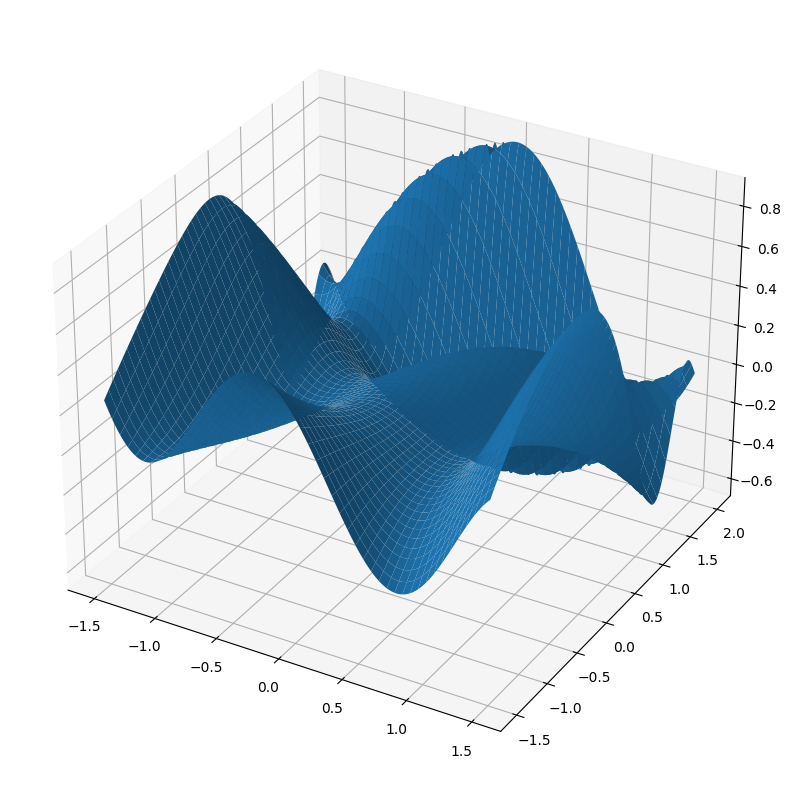

In [42]:
def trig(x):
    return np.sin(0.5 * x[0] ** 2 - 0.25 * x[1] ** 2 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))


# def trig_derivative(x):
#     h = 1e-5
#     return (trig(x[:, np.newaxis] + h * np.eye(2)) - trig(x[:, np.newaxis] - h * np.eye(2))) / (2 * h)

trig_derivative = symmetric_gradient_computer(trig)

trig_roi = SearchRegion2d((-1.5, 1.5), (-1.5, 2))

visualize_function_3d(trig, trig_roi)

## For fixed step size

Optimizer trajectory:
[[-0.1        -0.4       ]
 [-0.10521824 -0.38199919]
 [-0.11185515 -0.36454272]
 [-0.12010457 -0.34758569]
 [-0.13018685 -0.33108343]
 [-0.14234858 -0.3149924 ]
 [-0.15685956 -0.29927173]
 [-0.1740055  -0.28388572]
 [-0.19407368 -0.2688077 ]
 [-0.21732877 -0.25402572]
 [-0.243975   -0.23955054]
 [-0.27410232 -0.22542585]
 [-0.30761707 -0.21174018]
 [-0.34416528 -0.1986377 ]
 [-0.38306793 -0.1863236 ]
 [-0.42330022 -0.17505703]
 [-0.46355026 -0.16512577]
 [-0.50237431 -0.15680219]
 [-0.53842277 -0.15029041]
 [-0.57066446 -0.1456833 ]
 [-0.59852584 -0.1429465 ]
 [-0.62190274 -0.14193421]
 [-0.64106521 -0.1424263 ]
 [-0.65651444 -0.14417041]
 [-0.66884749 -0.14691624]
 [-0.67865904 -0.15043715]
 [-0.68648477 -0.15454017]
 [-0.69277728 -0.15906789]
 [-0.69790282 -0.16389577]
 [-0.70214899 -0.16892736]
 [-0.70573683 -0.17408919]]
Best value found: x* = [-0.70573683 -0.17408919] with f(x*) = -0.031276200624113425


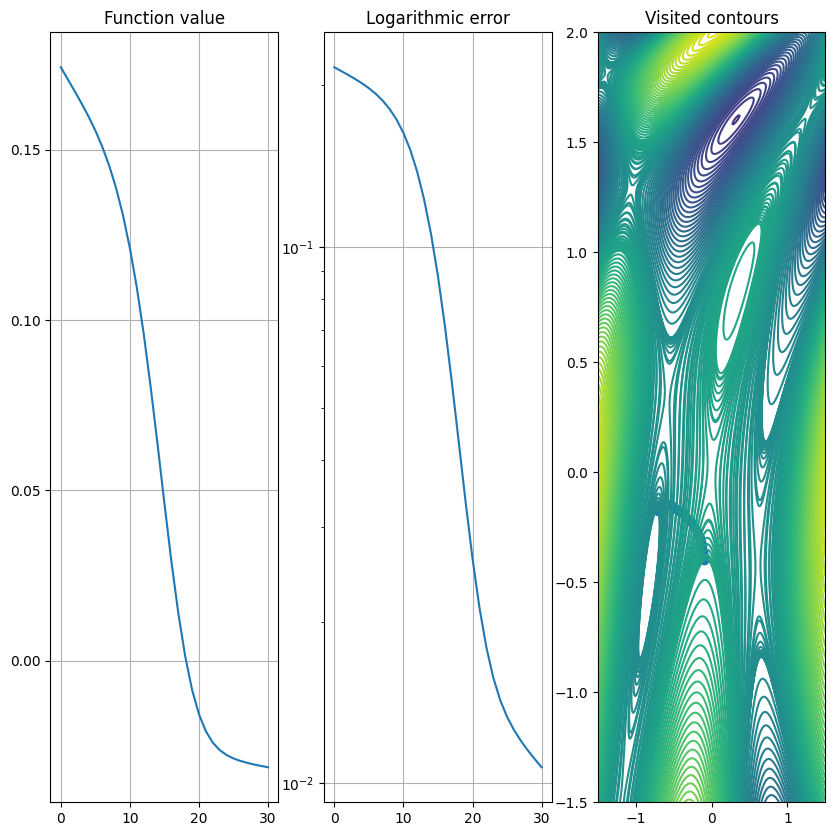

In [43]:
def optimize_fixed_step_size(iterations):
    return np.array(gradient_descent(trig, trig_derivative, np.array([-0.1, -0.4]), fixed_step_search(0.1), lambda f, points: len(points) > iterations))
visualize_optimizing_process(trig, trig_roi, optimize_fixed_step_size(30), trig(optimize_fixed_step_size(300)[-1]))

## With fibonacci search: accidentally finds even better solution than that local one

Optimizer trajectory:
[[-0.1        -0.4       ]
 [-0.56368107  1.19951126]
 [ 0.03592737  1.37331956]
 [ 0.00843128  1.46817607]
 [ 0.23559144  1.53401007]
 [ 0.22723358  1.56284869]
 [ 0.29901324  1.5836448 ]
 [ 0.29667624  1.59171116]
 [ 0.31648147  1.5974449 ]
 [ 0.31586016  1.59959099]
 [ 0.32110171  1.60110743]
 [ 0.32093883  1.60167044]
 [ 0.3223129   1.6020678 ]
 [ 0.32227029  1.60221515]
 [ 0.32262987  1.60231909]
 [ 0.32261872  1.60235766]
 [ 0.32271307  1.60238496]
 [ 0.32271015  1.60239506]
 [ 0.3227348   1.60240219]
 [ 0.32273404  1.60240482]
 [ 0.32274087  1.6024069 ]
 [ 0.32274068  1.60240754]
 [ 0.32274244  1.60240824]
 [ 0.32274244  1.60240826]
 [ 0.32274244  1.60240827]
 [ 0.32274244  1.60240826]
 [ 0.32274244  1.60240826]
 [ 0.32274244  1.60240826]
 [ 0.32274244  1.60240827]
 [ 0.32274245  1.60240826]
 [ 0.32274245  1.60240826]]
Best value found: x* = [0.32274245 1.60240826] with f(x*) = -0.6574000294758536


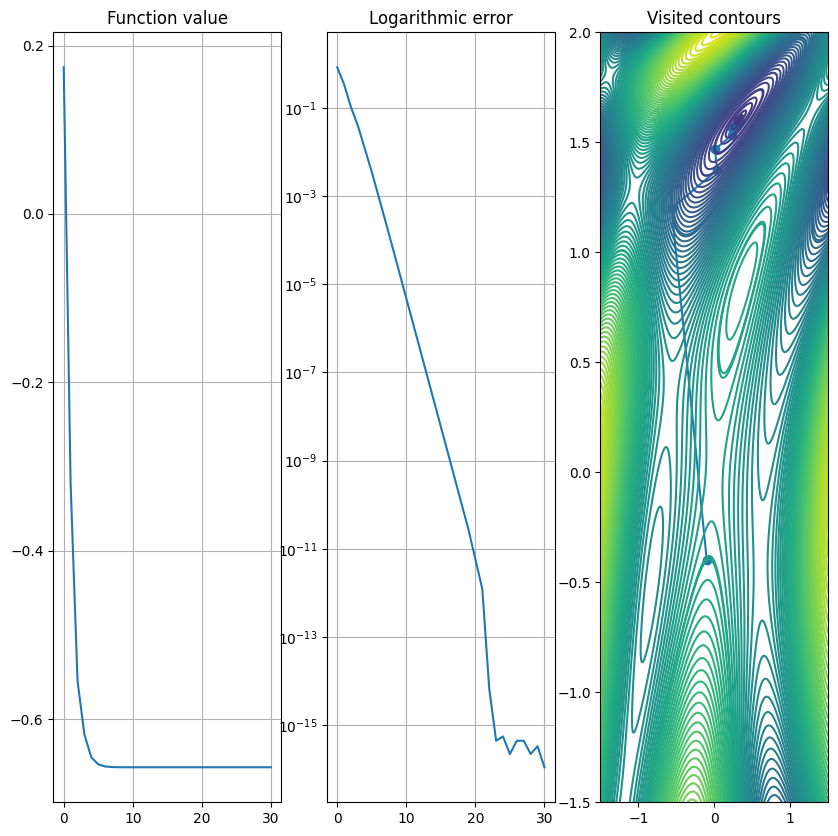

In [44]:
def optimize_fibonacci(iterations):
    return np.array(gradient_descent(trig, trig_derivative, np.array([-0.1, -0.4]), fibonacci_search(30),
                                     lambda f, points: len(points) > iterations))


visualize_optimizing_process(trig, trig_roi, optimize_fibonacci(30), trig(optimize_fibonacci(300)[-1]))